In [1]:
import numpy as np
import pandas as pd

fifa = pd.read_csv('fifa_processed.csv')

fifa = fifa.dropna()

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(fifa[['Age', 'Potential','International_reputation','Skill_moves', 'Work_rate', 'Body_type','Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']],fifa[['Overall']], test_size=0.2, random_state=0)

#fifa = fifa.fillna(0, inplace=True)

In [3]:
y_test

,Overall
7584,68
14854,60
6675,68
5063,70
12334,63
14007,61
6916,68
14013,61
14331,61
17238,55


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Dense(12, input_dim=40, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy','mse','mae'])

In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Train on 11621 samples, validate on 2906 samples
Epoch 1/100
11621/11621 [==============================] - 1s 119us/step - loss: 3599.3524 - accuracy: 0.0011 - mse: 3599.3516 - mae: 58.5914 - val_loss: 1950.1985 - val_accuracy: 0.0055 - val_mse: 1950.1980 - val_mae: 41.8331
Epoch 2/100
11621/11621 [==============================] - 1s 58us/step - loss: 878.0023 - accuracy: 0.0096 - mse: 878.0020 - mae: 25.6018 - val_loss: 421.3854 - val_accuracy: 0.0103 - val_mse: 421.3854 - val_mae: 17.3667
Epoch 3/100
11621/11621 [==============================] - 1s 55us/step - loss: 246.1198 - accuracy: 0.0236 - mse: 246.1198 - mae: 12.6868 - val_loss: 134.9615 - val_accuracy: 0.0313 - val_mse: 134.9615 - val_mae: 9.2148
Epoch 4/100
11621/11621 [==============================] - 1s 69us/step - loss: 97.2558 - accuracy: 0.0381 - mse: 97.2558 - mae: 7.7147 - val_loss: 74.3916 - val_accuracy: 0.0413 - val_mse: 74.3916 - val_mae: 6.7058
Epoch 5/100
11621/11621 [==============================] - 1s 63u

dict_keys(['val_loss', 'val_accuracy', 'val_mse', 'val_mae', 'loss', 'accuracy', 'mse', 'mae'])


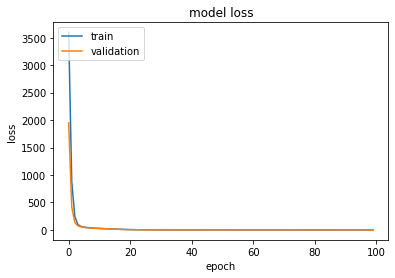

In [18]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
y_preds = model.predict(x_test)

In [20]:
y_predicts = pd.DataFrame(y_preds)

dict_keys(['val_loss', 'val_accuracy', 'val_mse', 'val_mae', 'loss', 'accuracy', 'mse', 'mae'])


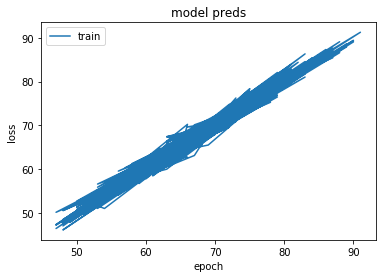

In [21]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(y_test, y_predicts)
plt.title('model preds')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
score = model.evaluate(x_test, y_test, batch_size=128)

3632/3632 [==============================] - 0s 23us/step


In [23]:
final = pd.DataFrame(y_predicts)

In [24]:
final = []

In [25]:
final = y_test

In [26]:
final = final.rename(columns = {'Overall':'Y_test'})

In [27]:
final['Y_ped'] = y_preds

In [29]:
final

,Y_test,Y_ped
7584,68,67.524895
14854,60,60.422264
6675,68,68.020836
5063,70,70.300407
12334,63,62.993046
14007,61,60.778393
6916,68,67.722206
14013,61,61.244442
14331,61,60.545483
17238,55,54.460106


In [127]:
model.evaluate(x_test,y_test)

3632/3632 [==============================] - 0s 80us/step


[0.6967675255258703,
 0.5079845786094666,
 0.6967674493789673,
 0.6218618750572205]

dict_keys(['val_loss', 'val_accuracy', 'val_mse', 'val_mae', 'loss', 'accuracy', 'mse', 'mae'])


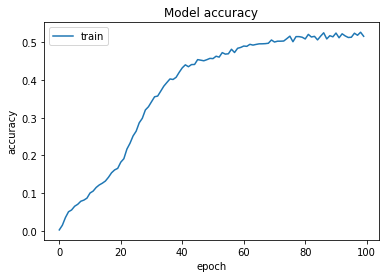

In [126]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()